Loaded '1ramp_1x3_PerDuelingDoubleDQNAgent_lr0.0001.csv' with 434 data points.
Loaded '1ramp_1x3_DuelingDoubleDQNAgent_lr0.0001_hybrid.csv' with 466 data points.

Plot saved as 'dqn_performance_comparison.png'


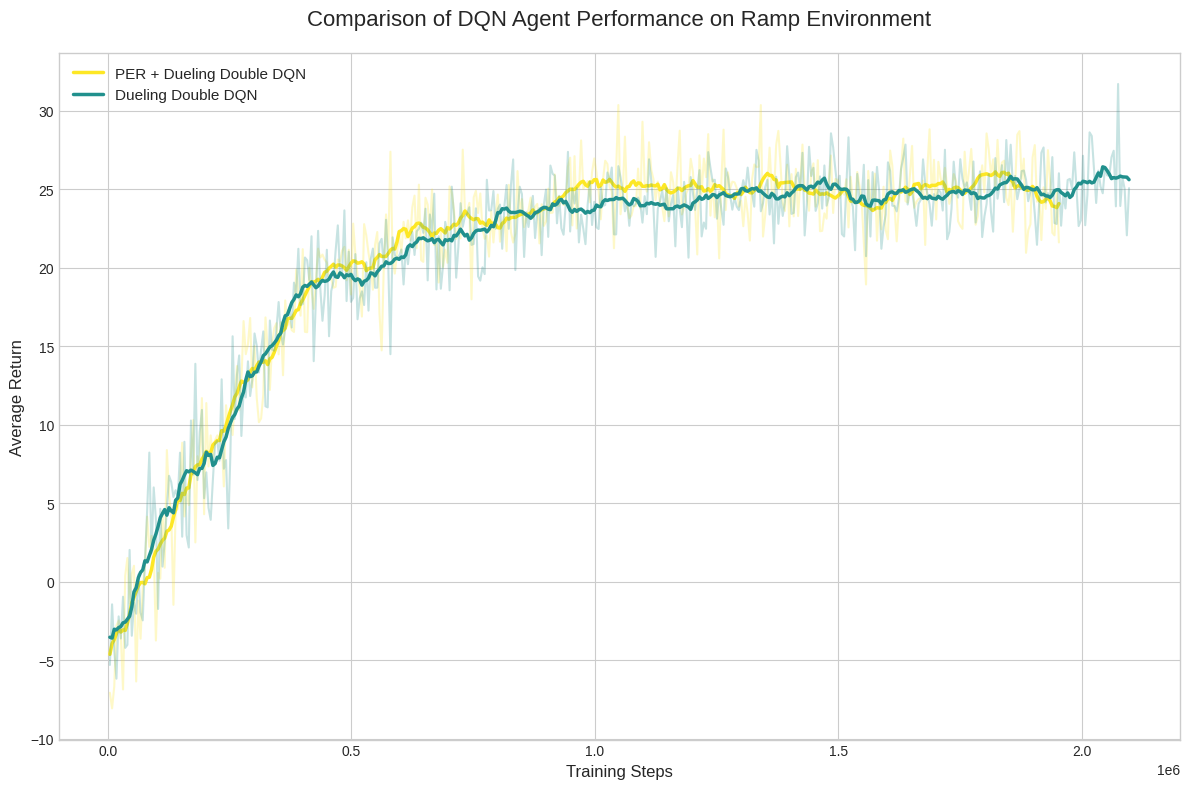

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# This is a "magic command" specific to Jupyter Notebooks.
# It ensures that plots are displayed 'inline' right below the code cell.
%matplotlib inline

# --- Configuration Section (Easily modifiable) ---

# Dictionary mapping filenames to the labels you want in the plot legend.
files_to_plot = {
    '1ramp_1x3_PerDuelingDoubleDQNAgent_lr0.0001.csv': 'PER + Dueling Double DQN',
    '1ramp_1x3_DuelingDoubleDQNAgent_lr0.0001_hybrid.csv': 'Dueling Double DQN'
}

# The size of the moving average window. A larger window means a smoother line.
# A value of 15 is a good starting point for this dataset.
ROLLING_AVERAGE_WINDOW = 15

# Plotting aesthetics
FIGURE_SIZE = (12, 8)
TITLE = 'Comparison of DQN Agent Performance on Ramp Environment'
X_LABEL = 'Training Steps'
Y_LABEL = 'Average Return'
OUTPUT_FILENAME = 'dqn_performance_comparison.png'

# --- Plotting Logic ---

# Set a professional plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

# Use a color cycle to get distinct colors for each agent
colors = plt.cm.viridis_r([i / len(files_to_plot) for i in range(len(files_to_plot))])

# Loop through each file in the configuration dictionary
for i, (filename, label) in enumerate(files_to_plot.items()):
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filename)
        print(f"Loaded '{filename}' with {len(df)} data points.")
        
        # Calculate the rolling average (smoothed value)
        # .rolling() creates a sliding window
        # .mean() calculates the average within that window
        # center=True makes the average more accurate by using points before and after
        smoothed_value = df['Value'].rolling(window=ROLLING_AVERAGE_WINDOW, center=True, min_periods=1).mean()

        # Plot the raw, noisy data with transparency (alpha)
        ax.plot(
            df['Step'],
            df['Value'],
            color=colors[i],
            alpha=0.25,
            label='_nolegend_' # Prefix with _ to hide from the final legend
        )

        # Plot the smoothed data with a solid, thicker line
        ax.plot(
            df['Step'],
            smoothed_value,
            color=colors[i],
            linewidth=2.5,
            label=label # This label will appear in the legend
        )

    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found. Please ensure it's in the same folder as the notebook.")
    except Exception as e:
        print(f"An error occurred while processing '{filename}': {e}")

# --- Final Plot Formatting ---
ax.set_title(TITLE, fontsize=16, pad=20)
ax.set_xlabel(X_LABEL, fontsize=12)
ax.set_ylabel(Y_LABEL, fontsize=12)

# Format the x-axis to use scientific notation for large step numbers (e.g., 1.5e6)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Add a legend to identify the lines
ax.legend(fontsize=11)

# Ensure all plot elements fit nicely
plt.tight_layout()

# Save the figure to a file. DPI=300 is standard for publications.
plt.savefig(OUTPUT_FILENAME, dpi=300)
print(f"\nPlot saved as '{OUTPUT_FILENAME}'")

# Display the plot in the notebook output
plt.show()